# Project Business Statistics: E-news Express


## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/2 - Business Statistics/Final-Project/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### Data Overview

##### Show the first and last few rows of the dataset

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


Observations:

The DataFrame has 6 columns in the Data Dictionary. Data in each row corresponds to user visiting the E-news Express website.

##### Check the shape of the dataset

In [ ]:
df.shape

(100, 6)

Observations: There are 100 rows and 6 columns in the data

##### Check the data types of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations: There are 2 numerical (1 int64 & 1 float64) and 4 object type columns in the dataset

##### Checking missing values

In [ ]:
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


Observations: There is no missing value in the data

#### Check for duplicates in the dataset

In [ ]:
print("There are",df.duplicated().sum(),"duplicated rows")

There are 0 duplicated rows


#### Get statistical summary of the dataset for numerical and categorical variables

In [ ]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


Observations:

Below is the time spent in the E-news Express website
* minimum: 19 seconds
* average: 5 minutes and 37 seconds
* maximum: 10 minutes and 71 seconds

In [ ]:
df.describe(include='object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


Observations:

As per data provided, it's confirmed the frequency of the A/B testing was split evenly between the 2 landing pages created for this testing.

### Univariate Analysis

#### Time spent on the page

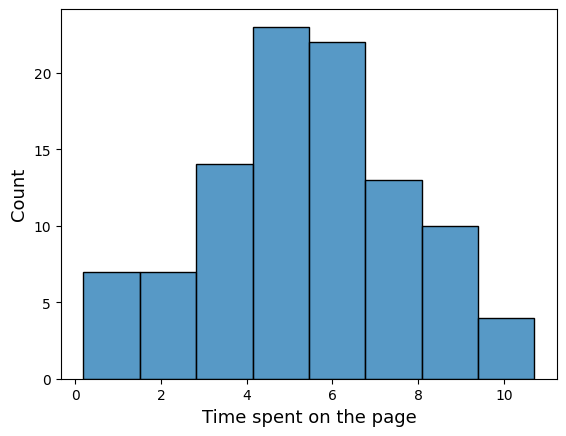

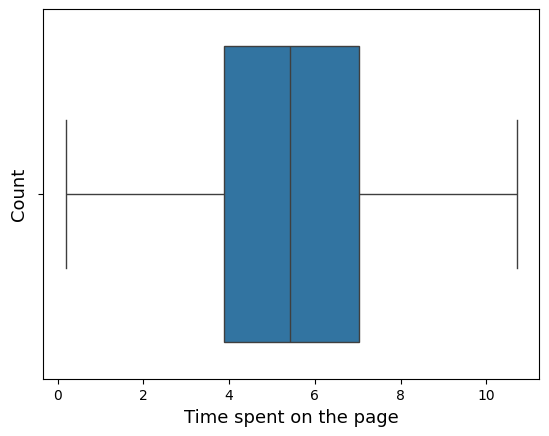

In [ ]:
chart = sns.histplot(data=df,x='time_spent_on_the_page')
chart.set_xlabel('Time spent on the page', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.show()

chart = sns.boxplot(data=df,x='time_spent_on_the_page')
chart.set_xlabel('Time spent on the page', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.show()

#### Observations:
* Time spent on the page doesn't have outliners
* The distribution is lightly right-skewed
* The majority of users spent between 4minutes and 7minutes approximately

#### Landing page

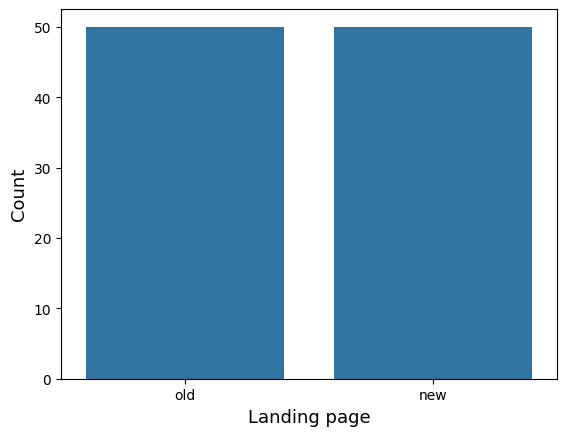

In [ ]:
chart = sns.countplot(data=df,x=df['landing_page'])
chart.set_xlabel('Landing page', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.show()

#### Observations: As noticed in the statistical summary, the chart can confirm that users were evenly distributed between old and new landing page during the A/B testing

#### Group

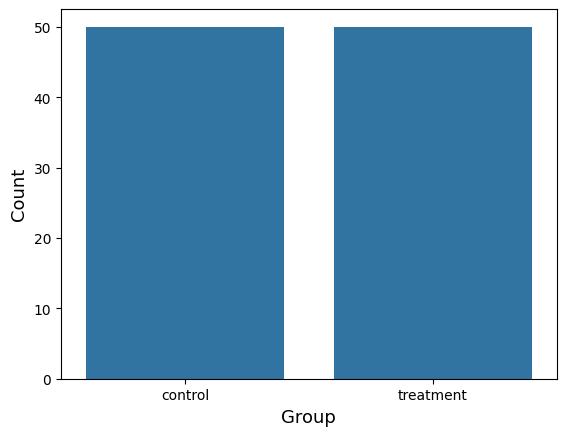

In [ ]:
chart = sns.countplot(data=df,x=df['group'])
chart.set_xlabel('Group', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.show()

#### Observations: As noticed in the statistical summary, the chart can confirm that users were evenly distributed between control and treatment groups during the A/B testing

#### Converted

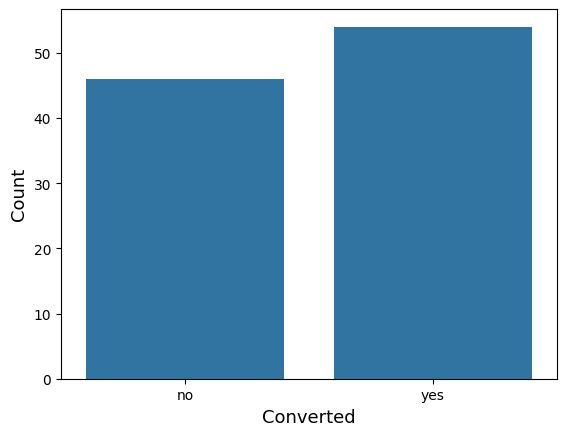

In [ ]:
chart = sns.countplot(data=df,x=df['converted'])
chart.set_xlabel('Converted', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.show()

#### Observations: the convertion rate was slightly higher

#### Language preferred

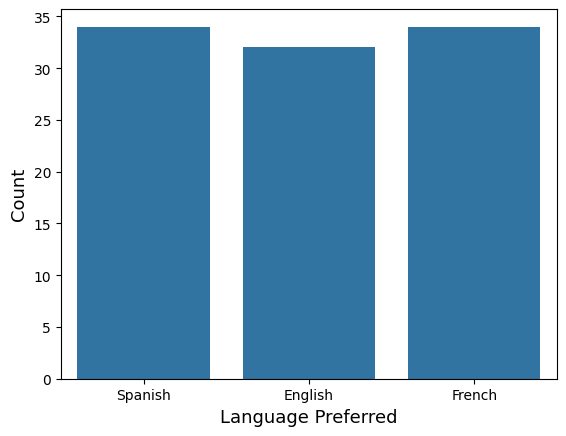

In [ ]:
chart = sns.countplot(data=df,x=df['language_preferred'])
chart.set_xlabel('Language Preferred', fontdict={'size': 13})
chart.set_ylabel('Count', fontdict={'size': 13})
plt.show()

#### Observations: Spanish and French were the preferred language chosen by users while English was the least preferred language

### Bivariate Analysis

#### Time spent on the page VS landing page

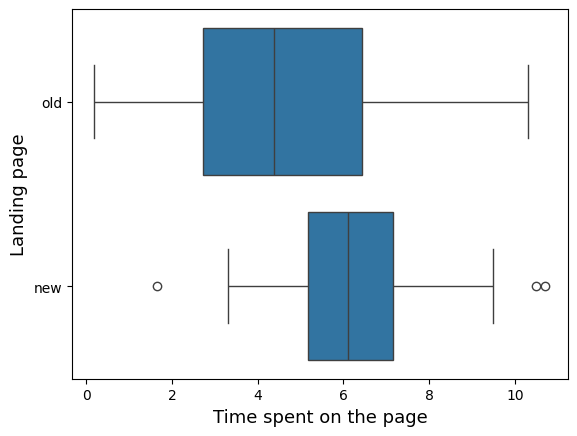

In [ ]:
chart = sns.boxplot(data=df,x='time_spent_on_the_page',y='landing_page')
chart.set_xlabel('Time spent on the page', fontdict={'size': 13})
chart.set_ylabel('Landing page', fontdict={'size': 13})
plt.show()

##### Observations:
* The old landing page didn't present outliners while the new landing page presented
* As per chart, the old page seems to retain the users more time while accessing the page

#### Time spent on the page VS convertion rate

---



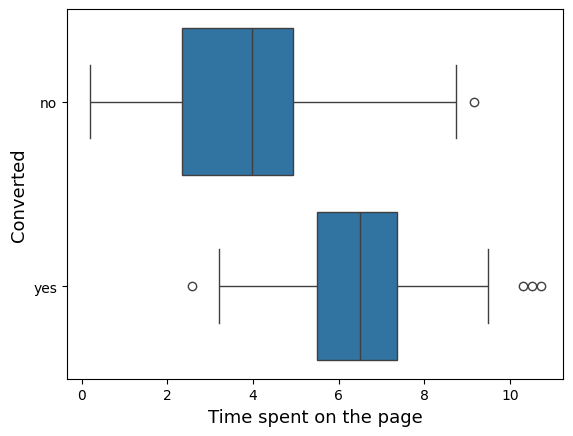

In [ ]:
chart = sns.boxplot(data=df,x='time_spent_on_the_page',y='converted')
chart.set_xlabel('Time spent on the page', fontdict={'size': 13})
chart.set_ylabel('Converted', fontdict={'size': 13})
plt.show()

##### Observations:
* Outliners were presented on both converted and not converted
* The chart shows that users that converted spent more time in the landing page

#### Time spent on the page VS language prefered

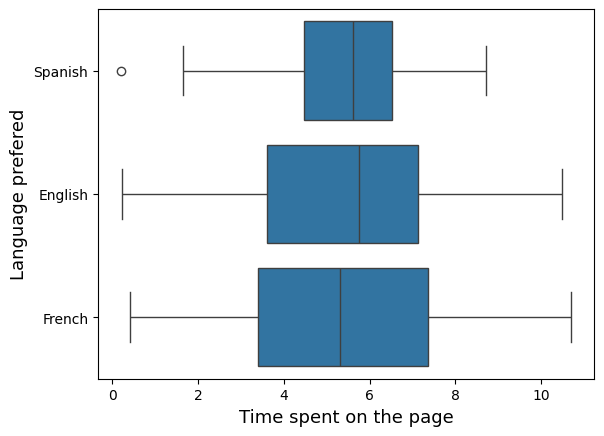

In [ ]:
chart = sns.boxplot(data=df,x='time_spent_on_the_page',y='language_preferred')
chart.set_xlabel('Time spent on the page', fontdict={'size': 13})
chart.set_ylabel('Language prefered', fontdict={'size': 13})
plt.show()

##### Observations:
* Only Spanish presented outliners
* Users selecting French as preferred language spent more time on the landing page

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Visual Analysis

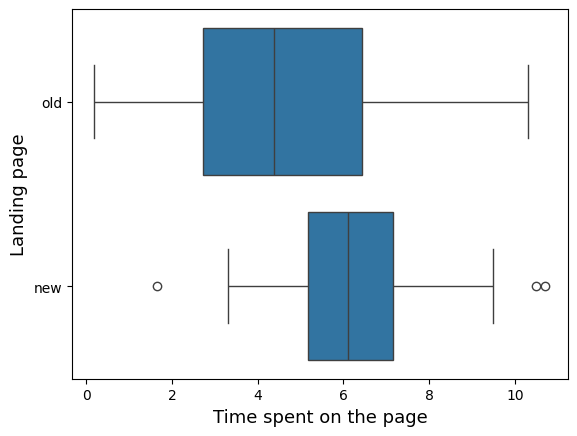

In [ ]:
chart = sns.boxplot(data=df,x='time_spent_on_the_page',y='landing_page')
chart.set_xlabel('Time spent on the page', fontdict={'size': 13})
chart.set_ylabel('Landing page', fontdict={'size': 13})
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: There is no difference in the time spent between the old and the new landing page

$H_a$: There is difference in the time spent between the old and the new landing page

### Step 2: Select Appropriate test

For this scenario we can use T-test (ttest_ind)

### Step 3: Decide the significance level

As described in the objectives -> α = 0.05

### Step 4: Collect and prepare data

In [ ]:
# old landing page data
timeOLP = df[df['landing_page']=='old']['time_spent_on_the_page']
# standard deviation
stdTimeOLP = timeOLP.std()

print('The standard deviation for the time spent in the old landing page is:', round(stdTimeOLP,2),"minutes")

# new landing page data
timeNLP = df[df['landing_page']=='new']['time_spent_on_the_page']
# standard deviation
stdTimeNLP = timeNLP.std()

print('\nThe standard deviation for the time spent in the new landing page is:', round(stdTimeNLP,2),"minutes")

The standard deviation for the time spent in the old landing page is: 2.58 minutes

The standard deviation for the time spent in the new landing page is: 1.82 minutes


### Step 5: Calculate the p-value

In [ ]:
# Library to help with statistical analysis
from scipy.stats import ttest_ind

stats, pVal = ttest_ind(timeOLP, timeNLP, equal_var=True, alternative='two-sided')
print("The p-value is", str(pVal))

The p-value is 0.000263224705619001


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if pVal < 0.05:
    print("As the p-value", pVal, "is less than the level of significance, we reject the null hypothesis.")
else:
    print("As the p-value", pVal, "is greater than the level of significance, we fail to reject the null hypothesis.")

As the p-value 0.000263224705619001 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is < 0.05, we reject the null hypothesis. Therefore, we have enough statistical evidence to say that the proportion of users spending time on on the new landing page is different from the proportion of users spending time on the old landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Visual Analysis

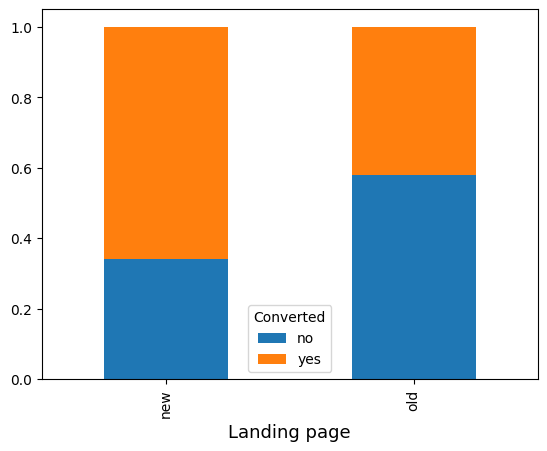

In [ ]:
chart = pd.crosstab(df["landing_page"],df["converted"],normalize='index').plot(kind="bar",stacked=True)
chart.set_xlabel('Landing page', fontdict={'size': 13})
plt.legend().set_title("Converted")
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: There is no difference in the conversion rates between the old and the new landing page

$H_a$: There is difference in the conversion rates between the old and the new landing page

### Step 2: Select Appropriate test

For this scenario we can use z-test (proportions_ztest)

### Step 3: Decide the significance level

As described in the objectives -> α = 0.05

### Step 4: Collect and prepare data

In [ ]:
# new landing page data
dataNLP = df.loc[df['landing_page']=='new']
convertedNLP = (dataNLP.loc[dataNLP['converted'].isin(['yes'])].count())['converted']

totalNLP = df['landing_page'].value_counts()['new']

# old landing page data
dataOLP = df.loc[df['landing_page']=='old']
convertedOLP = (dataOLP.loc[dataOLP['converted'].isin(['yes'])].count())['converted']

totalOLP = df['landing_page'].value_counts()['old']

### Step 5: Calculate the p-value

In [ ]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

stats, pVal = proportions_ztest([convertedNLP, convertedOLP], [totalNLP, totalOLP], alternative='two-sided')
print("The p-value is", str(pVal))

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if pVal < 0.05:
    print("As the p-value", pVal, "is less than the level of significance, we reject the null hypothesis.")
else:
    print("As the p-value", pVal, "is greater than the level of significance, we fail to reject the null hypothesis.")

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

The pvalue is < 0.05 so we reject the null hypothesis. Hence, we do not have enough statistical evidence to say that convertion rate for the new page is greater than the convertion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

### Visual Analysis

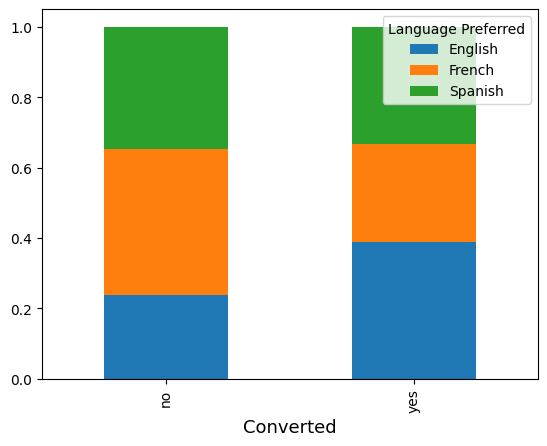

In [ ]:
chart = pd.crosstab(df['converted'],df["language_preferred"],normalize='index').plot(kind="bar", stacked=True)
chart.set_xlabel('Converted', fontdict={'size': 13})
plt.legend().set_title("Language Preferred")
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: convertion is related of preferred language

$H_a$: convertion is independent of preferred language

### Step 2: Select Appropriate test

For this scenario we can use Chi-square test of independence of attributes

### Step 3: Decide the significance level

As described in the objectives -> α = 0.05

### Step 4: Collect and prepare data

In [ ]:
data = pd.crosstab(df['converted'], df['language_preferred'])
data

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import chi2_contingency

chi2, pVal, dof, exp_freq = chi2_contingency(data)

print('The p-value is', pVal)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if pVal < 0.05:
    print("As the p-value", pVal, "is less than the level of significance, we reject the null hypothesis.")
else:
    print("As the p-value", pVal, "is greater than the level of significance, we fail to reject the null hypothesis.")

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The pvalue is > 0.05 so we fail to reject the null hypothesis. Therefore, we have enough statistical evidence to say that convertion is independent of preferred language.

## 4. Is the time spent on the new page same for the different language users?

### Visual Analysis

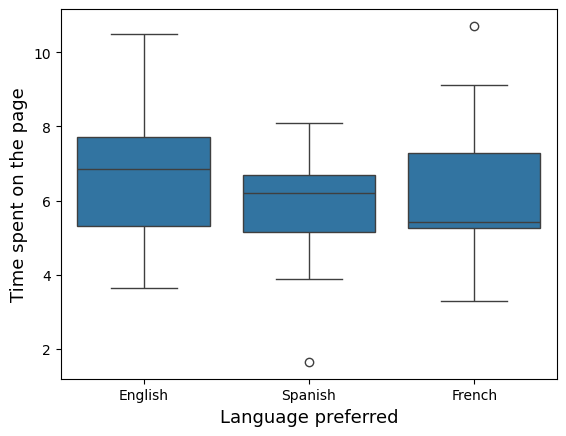

In [ ]:
data = df.loc[df['landing_page']=='new']
chart = sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=data)
chart.set_xlabel('Language preferred', fontdict={'size': 13})
chart.set_ylabel('Time spent on the page', fontdict={'size': 13})
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0:$  The mean time spent on the page with respect to each language preferred is equal

$H_a:$ The mean time spent on the page with respect to each language preferred is NOT equal

### Step 2: Select Appropriate test

For this scenario we can use one-way ANova test

### Step 3: Decide the significance level

As described in the objectives -> α = 0.05

### Step 4: Collect and prepare data

In [ ]:
english = data.loc[data['language_preferred']=='English']['time_spent_on_the_page']
spanish = data.loc[data['language_preferred']=='Spanish']['time_spent_on_the_page']
french = data.loc[data['language_preferred']=='French']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
from scipy import stats
statistic, pValue = stats.f_oneway(english, spanish, french)
print('The p-value is', pValue)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if pVal < 0.05:
    print("As the p-value", pVal, "is less than the level of significance, we reject the null hypothesis.")
else:
    print("As the p-value", pVal, "is greater than the level of significance, we fail to reject the null hypothesis.")

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The pvalue is > 0.05 so we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that time spent in the new page is independent of language preferred.

## Conclusion and Business Recommendations

Conclusions:

* from the data sample, it is clear that users spent more time in the new landing page comparaing to the old landing page.
* convertion rate for the new landing page is higher than the convertion rate for old landing page, indicating improvement to the conversion process.
* the analysis shows that conversion is independent of preferred language, showing consistence between diferent languages.
* the time spent on the page is not significantly different between language preferences, showing a consistence independent of language selected.

Business recommentations:

* while the new landing page seemed to attrack more people, further changes can be explored to improve convertion rate.
* as the language is not significantly different between language preferences, the business should consider exploring geolocation focused content.
* explore users journey and identify potential bottlenecks or friction points, would help to improve user usability and improve the convertion rate.
* continuous monitoring and iteration through regular A/B testing to identify areas where the website is not performing convertion, helping the business to identify other friction points.   

___